In [1]:
import cProfile
from leicaautomator import find_tma_regions
from skimage.io import imread, imshow
from leicaautomator.utils import apply_chunks, _get_chunks
from leicaautomator.filters import *
from skimage.morphology import square, disk
import numpy as np

img = imread('../master/data/experiment--2015_03_21_17_09_56/stitched--overview.png')

/Users/arve/miniconda3/envs/leicaautomator/lib/python3.4/site-packages/skimage/viewer/utils/core.py:11: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warnings.warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
cProfile.run('regions = find_tma_regions(img)', 'profile.csv')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [9]:
#%time filtered_orig = pop_bilateral(img, square(9))
#%time filtered = apply_chunks(pop_bilateral, img)
#%time filtered = mean(img)
%time filtered = apply_chunks(mean, img, depth=4)

CPU times: user 4.22 s, sys: 1.23 s, total: 5.46 s
Wall time: 1.67 s


(251, 181)

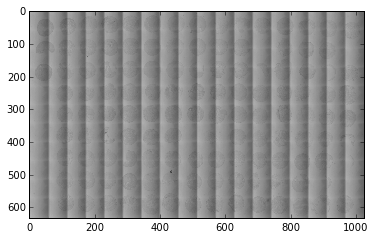

In [10]:
%matplotlib inline
imshow(filtered[::8, ::8])
img.max(), filtered.max()

In [9]:
_pop_bilateral.inspect_types()

_pop_bilateral (array(int16, 2d, C), int64, array(int64, 2d, C), array(uint8, 2d, C), int64, int64)
--------------------------------------------------------------------------------
# File: /Users/arve/Dokumenter/git/leicaautomator/leicaautomator/filters.py
# --- LINE 4 --- 

@jit(nopython=True, nogil=True)

# --- LINE 5 --- 

def _pop_bilateral(img, pd, out, s0=10, s1=10):

    # --- LINE 6 --- 
    # label 0
    #   img = arg(0, name=img)  :: array(int16, 2d, C)
    #   pd = arg(1, name=pd)  :: int64
    #   where = arg(2, name=where)  :: array(int64, 2d, C)
    #   del where
    #   out = arg(3, name=out)  :: array(uint8, 2d, C)
    #   s0 = arg(4, name=s0)  :: int64
    #   s1 = arg(5, name=s1)  :: int64
    #   $0.2 = getattr(attr=shape, value=img)  :: (int64 x 2)
    #   $0.5 = exhaust_iter(count=2, value=$0.2)  :: (int64 x 2)
    #   del $0.2
    #   $0.3 = static_getitem(index=0, value=$0.5)  :: int64
    #   $0.4 = static_getitem(index=1, value=$0.5)  :: int64
    #   del $0.5


In [6]:
filtered_orig[:10, :10]

array([[81, 81, 81, 81, 81, 81, 81, 81, 81, 81],
       [79, 78, 77, 76, 75, 74, 73, 72, 72, 72],
       [77, 75, 73, 71, 69, 67, 65, 63, 63, 63],
       [75, 72, 69, 66, 63, 60, 57, 54, 54, 54],
       [73, 69, 65, 61, 57, 53, 49, 45, 45, 45],
       [71, 66, 61, 25, 30, 35, 40, 45, 45, 45],
       [69, 63, 57, 30, 36, 42, 48, 54, 54, 54],
       [67, 60, 53, 35, 42, 49, 56, 63, 63, 63],
       [65, 57, 49, 40, 48, 56, 64, 72, 72, 72],
       [63, 54, 45, 45, 54, 63, 72, 81, 81, 81]], dtype=uint8)

In [11]:
len(regions)

65

In [12]:
import pstats
p = pstats.Stats('profile.csv')
p = p.sort_stats('tottime')

In [13]:
p.print_stats()

Mon May 18 17:46:16 2015    profile.csv

         234186 function calls (231241 primitive calls) in 10.814 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    4.894    4.894    9.679    9.679 {built-in method exec_}
        1    1.511    1.511    1.513    1.513 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/filters/rank/bilateral.py:37(_apply)
        1    1.012    1.012    1.014    1.014 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/filters/rank/generic.py:73(_apply_scalar_per_pixel)
        9    0.921    0.102    1.542    0.171 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/matplotlib/image.py:149(_get_unsampled_image)
        7    0.298    0.043    0.299    0.043 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/numpy/ma/core.py:2209(masked_invalid)
        9    0.215    0.024    0.215    0.024 {built-in method resi